<a href="https://colab.research.google.com/github/mauricionoris/25B3_ml/blob/master/colabs/Metricas_Classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Métricas de Avaliação para Classificação em Machine Learning

### 1. Acurácia (Accuracy)

```math
\text{Acurácia} = \frac{TP + TN}{TP + TN + FP + FN}
```

* Mede a proporção de previsões corretas sobre o total.
* Útil quando as classes estão balanceadas.

---

### 2. Precisão (Precision)

```math
\text{Precisão} = \frac{TP}{TP + FP}
```

* Mede quantas das previsões positivas realmente são positivas.
* Importante quando o custo de falsos positivos é alto.

---

### 3. Revocação (Recall) ou Sensibilidade

```math
\text{Recall} = \frac{TP}{TP + FN}
```

* Mede quantos dos casos positivos reais foram corretamente classificados.
* Importante quando o custo de falsos negativos é alto.

---

### 4. F1-Score

```math
F1 = 2 \cdot \frac{\text{Precisão} \cdot \text{Recall}}{\text{Precisão} + \text{Recall}}
```

* Média harmônica entre precisão e recall.
* Útil quando há desbalanceamento de classes.

---

### 5. Matriz de Confusão

* Tabela que mostra:

  * Verdadeiros Positivos (TP)
  * Falsos Positivos (FP)
  * Verdadeiros Negativos (TN)
  * Falsos Negativos (FN)
* Ajuda a entender os tipos de erro do modelo.

---

### 6. Curva ROC e AUC

* **Curva ROC**: Gráfico entre a taxa de verdadeiros positivos (TPR) e a taxa de falsos positivos (FPR).
* **AUC (Area Under the Curve)**: Mede a capacidade do modelo de separar as classes em todos os thresholds.




# Exemplo

In [ ]:
y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]
y_pred = [1, 0, 1, 0, 0, 1, 1, 0, 1, 0]




## 1. Matriz de Confusão

|        | Predito 0 | Predito 1 |
| ------ | --------- | --------- |
| Real 0 | TN = 4    | FP = 1    |
| Real 1 | FN = 1    | TP = 4    |

Contagem manual:

* **TP (1 predito como 1)**: posições 0, 2, 5, 8 → 4 casos
* **TN (0 predito como 0)**: posições 1, 4, 7, 9 → 4 casos
* **FP (0 predito como 1)**: posição 6 → 1 caso
* **FN (1 predito como 0)**: posição 3 → 1 caso

---

## 2. Acurácia (Accuracy)

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{4 + 4}{4 + 4 + 1 + 1} = \frac{8}{10} = 0.80
$$

---

## 3. Precisão (Precision)

$$
\text{Precision} = \frac{TP}{TP + FP} = \frac{4}{4 + 1} = \frac{4}{5} = 0.80
$$

---

## 4. Revocação (Recall / Sensibilidade)

$$
\text{Recall} = \frac{TP}{TP + FN} = \frac{4}{4 + 1} = \frac{4}{5} = 0.80
$$

---

## 5. F1-Score

$$
F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}
= 2 \cdot \frac{0.80 \cdot 0.80}{0.80 + 0.80}
= 2 \cdot \frac{0.64}{1.6}
= 2 \cdot 0.4 = 0.80
$$

---

## 6. AUC (Área sob a Curva ROC)

Para calcular o AUC manualmente, precisamos das **probabilidades** previstas, não apenas os rótulos.
Mas vamos supor agora que temos também:

```python
y_proba = [0.9, 0.3, 0.8, 0.4, 0.1, 0.95, 0.7, 0.2, 0.85, 0.05]
```

Podemos usar o `roc_auc_score` para calcular o valor exato:

```python
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_true, y_proba)
print(f"AUC: {auc:.2f}")
```

Resultado aproximado (ao rodar):

```
AUC: 0.98
```

> Isso mostra que o modelo ordena muito bem as probabilidades dos positivos acima dos negativos, mesmo que cometa alguns erros de threshold.

---

### Conclusão (manual):

* **Acurácia** = 0.80
* **Precisão** = 0.80
* **Recall** = 0.80
* **F1-score** = 0.80
* **AUC** ≈ 0.98 (baseado em probabilidades)



# Exemplo 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score
)
from sklearn.model_selection import train_test_split

# 1. Carregar os dados
data = load_breast_cancer()
X, y = data.data, data.target

# 2. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Treinar o modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 4. Prever no conjunto de teste
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilidades para a classe positiva

# 5. Calcular métricas
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

# 6. Exibir resultados
print(f"Acurácia:  {acc:.4f}")
print(f"Precisão:  {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"AUC-ROC:   {auc:.4f}")



Acurácia:  0.9649
Precisão:  0.9589
Recall:    0.9859
F1-Score:  0.9722
AUC-ROC:   0.9953


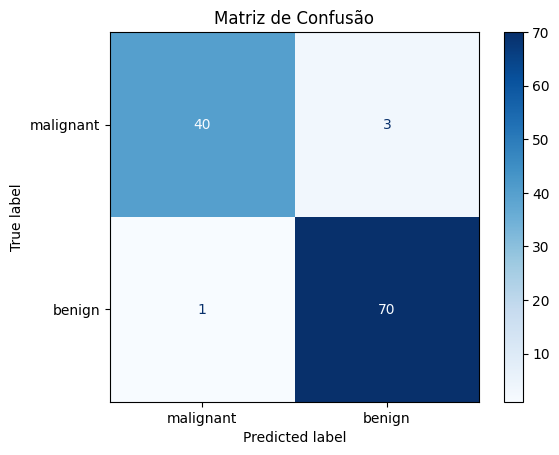

In [3]:
# 7. Matriz de Confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusão")
plt.show()




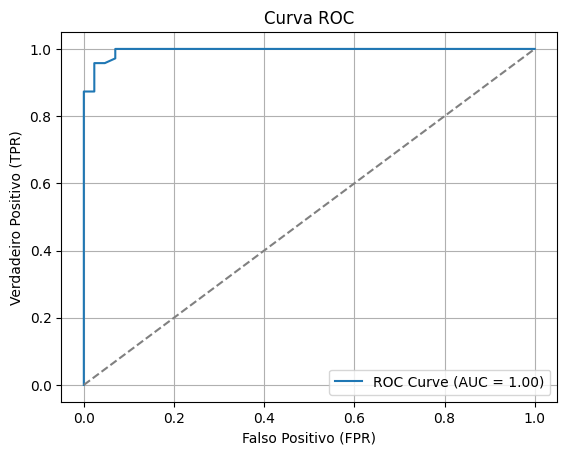

In [4]:
# 8. Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Falso Positivo (FPR)")
plt.ylabel("Verdadeiro Positivo (TPR)")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## O que é a Curva ROC?

**ROC** significa **Receiver Operating Characteristic**.

É uma **curva** que mostra a performance de um classificador binário em diferentes limiares (thresholds) de decisão.

### Eixos da Curva:

* **Eixo X (FPR)**: Falso Positivo Rate

  $$
  FPR = \frac{FP}{FP + TN}
  $$

* **Eixo Y (TPR)**: Verdadeiro Positivo Rate (também chamado de **Recall**)

  $$
  TPR = \frac{TP}{TP + FN}
  $$

### Como a curva é construída:

1. O modelo retorna **probabilidades** (não só 0 ou 1).
2. Varia-se o **threshold** para decidir quando considerar uma previsão como "classe 1".
3. Para cada threshold, calcula-se o TPR e o FPR.
4. Plota-se TPR vs FPR → isso é a curva ROC.

---

## O que é o AUC (Area Under the Curve)?

* **AUC (Área sob a Curva ROC)** mede **a capacidade do modelo de separar as classes**.
* Varia de **0 a 1**:

  * **1.0**: separação perfeita (modelo ideal)
  * **0.5**: aleatório (modelo ruim)
  * **< 0.5**: pior que aleatório (inversão completa)

---

## Interpretação da AUC:

* **AUC = 0.90** → significa que, dado um par (exemplo positivo, exemplo negativo), o modelo tem 90% de chance de **atribuir probabilidade maior ao exemplo positivo**.
* **Quanto maior a AUC**, melhor o modelo consegue **diferenciar as classes**.

---

## Exemplo gráfico:

* Uma curva ROC **próxima do canto superior esquerdo** indica um **bom classificador**.
* A linha diagonal (45º) indica **modelo aleatório**.
* Abaixo dessa linha → modelo pior que aleatório (inverso).

---

## Quando usar ROC e AUC?

* Quando o **modelo retorna probabilidades**, e você quer avaliar o desempenho **em vários thresholds**.
* Quando você está lidando com **classes desbalanceadas**, o AUC é **mais informativo** do que a acurácia.



# Exercícios


## Exercício 1: Classificação de Diabetes

### Dataset:

[Kaggle - Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

### Objetivo:

Prever se uma paciente tem ou não diabetes com base em dados clínicos.

### Instruções:

1. Carregue o dataset.
2. Divida os dados em treino (80%) e teste (20%).
3. Treine um modelo de classificação (sugestão: `RandomForestClassifier` ou `LogisticRegression`).
4. Avalie o desempenho do modelo com as métricas:

   * Acurácia
   * Precisão
   * Recall
   * F1-score
   * Matriz de Confusão
   * Curva ROC e AUC

### Extra:

* Tente ajustar o limiar de decisão (`threshold`) e observe como as métricas variam.


## Exercício 2 - Previsão de Emoções em Texto --> DESAFIO <--

### Dataset:

[Kaggle - Emotion Dataset for NLP](https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp)

### Descrição:

Dataset contendo frases curtas em inglês associadas a uma emoção, como *joy*, *sadness*, *anger*, *fear*, etc.

### Objetivo:

Prever a emoção de uma frase com base no seu conteúdo textual.

### Tarefa:

Transforme o problema em uma **classificação binária**:

* Por exemplo, classifique se a frase expressa ou não **"anger"** (raiva).

  * 1 se a emoção é "anger"
  * 0 caso contrário

---

### Instruções:

1. Baixe o dataset do Kaggle e carregue-o no notebook.
2. Converta o problema para binário (anger vs. not-anger).
3. Faça o pré-processamento textual:

   * Minúsculas, remoção de pontuação, stopwords, etc.
4. Transforme os textos em vetores (`TfidfVectorizer` ou `CountVectorizer`).
5. Divida em treino e teste (ex: 80/20).
6. Treine um modelo de classificação (`LogisticRegression`, `NaiveBayes`, etc).
7. Avalie o desempenho com:

   * Acurácia
   * Precisão
   * Recall
   * F1-score
   * Matriz de Confusão
   * Curva ROC e AUC

---

### Extra:

* Compare o desempenho com e sem stemming/lemmatização.
* Tente outras emoções além de "anger" (ex: "joy" ou "sadness").


